# Introduction to Logistic regression
Logistic regression is a classification algorithm for categorical variables.
- Can be used for binary or multi-class classification
- Categorical features need to be dummy or indicator coded

Good examples for using a Logistic regression are:
1. Predicting the probability of a person having a heart attack
2. Predicting the mortality in injured patients
3. Predicting the probability of failure of a given process or product

Logistic Regression is a variation of Linear Regression, used when the observed dependent variable, <b>y</b>, is categorical. It produces a formula that predicts the probability of the class label as a function of the independent variables.

Logistic regression fits a special s-shaped curve by taking the linear regression function and transforming the numeric estimate into a probability with the following function, which is called the sigmoid function 𝜎:

$$
ℎ_\theta(𝑥) = \sigma({\theta^TX}) =  \frac {e^{(\theta_0 + \theta_1  x_1 + \theta_2  x_2 +...)}}{1 + e^{(\theta_0 + \theta_1  x_1 + \theta_2  x_2 +\cdots)}}
$$
Or:
$$
ProbabilityOfaClass_1 =  P(Y=1|X) = \sigma({\theta^TX}) = \frac{e^{\theta^TX}}{1+e^{\theta^TX}} 
$$

### Training algorithm
1. Initialize the parameters randomly
2. Feed the cost function with training set, and calculate the error 
3. Calculate the gradient of cost function
4. Update weights with new values
5. Go to step 2 until cost is small enough
6. Predict the target variable

# 1. About the dataset - Customer churn with Logistic Regression
The below report will identify which customers of a telecommunication company are leaving and why.

In [1]:
# Load all necessary libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, jaccard_score, classification_report, log_loss
import itertools

We will use a telecommunications dataset for predicting customer churn. We will be working with a historical dataset where each row represents one customer.

The dataset includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they had been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents


In [2]:
# Load the dataset
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv'
df = pd.read_csv(path)
df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


# 2. Data pre-processing and selection
We select the predictor and labels for our model. Our target data must be an integer as per skitlearn algorithm requirement.

In [3]:
# We subset features for our model
df = df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless','churn']]
df['churn'] = df['churn'].astype('int')
df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


In [4]:
# Define predictor variables X and target variable y
X = np.asanyarray(df.drop('churn', axis=1))
y = np.asanyarray(df.pop('churn'))
print(f"Independent variables are:\n{X[:5]}\n")
print(f"Target variable is:\n{y[:5]}")

Independent variables are:
[[ 11.  33.   7. 136.   5.   5.   0.   1.   1.]
 [ 33.  33.  12.  33.   2.   0.   0.   0.   0.]
 [ 23.  30.   9.  30.   1.   2.   0.   0.   0.]
 [ 38.  35.   5.  76.   2.  10.   1.   1.   1.]
 [  7.  35.  14.  80.   2.  15.   0.   1.   0.]]

Target variable is:
[1 1 0 0 0]


Next, we standardise the independent features using StandardScaler().

In [5]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695,  0.64686916,  1.56469673],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695, -1.54590766, -0.63910148],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695, -1.54590766, -0.63910148],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ,  0.64686916,  1.56469673],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695,  0.64686916, -0.63910148]])

### Train/Test dataset
We split our dataset into train and test set:

In [6]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (160, 9) (160,)
Test set: (40, 9) (40,)


# 3. Modelling (Logistic Regression with Scikit-learn)
We build our **LogisticRegression** using the Scikit-learn package. This function implements logistic regression and can use different numerical optimizers to find parameters, including ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’ solvers.

In [7]:
# Model a Logistic Regression
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [8]:
# Now we can predict target values using our test set
yhat = LR.predict(X_test)
yhat[:5]

array([1, 1, 0, 0, 0])

__predict_proba__  returns estimates for all classes, ordered by the label of classes. So, the first column is the probability of class 0, P(Y=0|X), and second column is probability of class 1, P(Y=1|X):

In [9]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob[:5]

array([[0.49812991, 0.50187009],
       [0.49794852, 0.50205148],
       [0.65799911, 0.34200089],
       [0.62781622, 0.37218378],
       [0.71982045, 0.28017955]])

# 4. Evaluation
### jaccard index
We can use jaccard index for accuracy evaluation. We define jaccard as the size of the intersection divided by the size of the union of the two label sets. If the entuire set of predicted labels for a sample strictly matches with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.

In [10]:
# jaccard_score
jaccard_score(y_test, yhat, pos_label=0)

np.float64(0.7)

### Confusion Matrix
Another way of looking at the accuracy of the classifier is to look at the **confusion matrix**.

In [11]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[10  2]
 [ 7 21]]


Confusion matrix, without normalization
[[10  2]
 [ 7 21]]


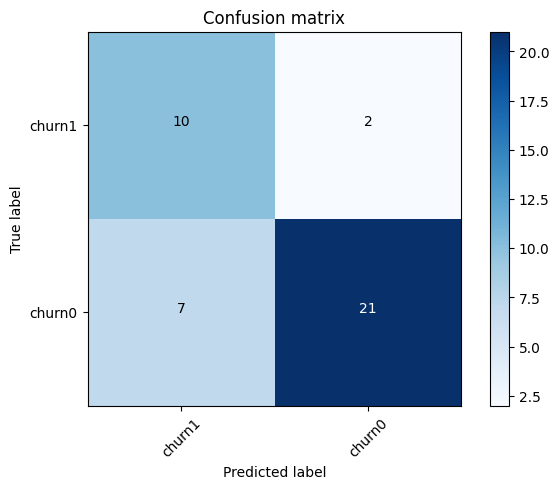

In [12]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)

# Plot non-normalised confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn1', 'churn0'], normalize=False, title='Confusion matrix')

The first row shows customers with an actual churn value of 1 in the test set. Out of 40 customers, 12 had a churn value of 1, but the classifier correctly identified only 10, misclassifying the remaining 2 as 0. These misclassifications represent the model’s errors for this group.

In the second row, representing customers with a churn value of 0, the classifier performed a bit better. Of 28 customers, it correctly predicted 21 as 0, with 7 misclassified as 1.

The confusion matrix effectively summarizes the model’s performance, showing its ability to differentiate between classes by providing counts for true positives, false positives, true negatives, and false negatives in this binary classification problem.

In [13]:
# Classification report
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.91      0.75      0.82        28
           1       0.59      0.83      0.69        12

    accuracy                           0.78        40
   macro avg       0.75      0.79      0.76        40
weighted avg       0.82      0.78      0.78        40



- Precision measures the accuracy of predictions for a given class and is calculated as:  \text{Precision} = \frac{TP}{TP + FP} .
- Recall represents the true positive rate and is calculated as:  \text{Recall} = \frac{TP}{TP + FN} .

Using these, we can calculate the precision and recall for each class.

F1 Score:
The F1 score is the harmonic mean of precision and recall, balancing the two metrics. It ranges from 0 (worst) to 1 (best) and indicates whether a classifier performs well in both precision and recall.

The overall accuracy of the classifier is given by the average F1 score across both labels, which is 0.78 in this case.

### Log loss
Let's try __log loss__ for evaluation. In logistic regression, the output can be the probability of customer churn is yes (or equals to 1). This probability is a value between 0 and 1.
Log loss( Logarithmic loss) measures the performance of a classifier where the predicted output is a probability value between 0 and 1.

In [14]:
# Log loss
log_loss(y_test, yhat_prob)

0.552789839718401